### Decision Tree Exercises
Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:



In [1]:
import pandas as pd
import numpy as np
import acquire
import prepare

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
titanic = acquire.get_titanic_data()
titanic

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [3]:
train, validate, test = prepare.prep_titanic_data(titanic)
train, validate, test = prepare.impute_age_titanic(train, validate, test)
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
301,1,3,30.189296,2,0,23.2500,0,1,1,0
290,1,1,26.000000,0,0,78.8500,1,0,0,1
779,1,1,43.000000,0,1,211.3375,0,0,0,1
356,1,1,22.000000,0,1,55.0000,0,0,0,1
147,0,3,9.000000,2,2,34.3750,0,0,0,1


In [4]:
train.info(), validate.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 301 to 3
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 498 non-null    int64  
 1   pclass                   498 non-null    int64  
 2   age                      498 non-null    float64
 3   sibsp                    498 non-null    int64  
 4   parch                    498 non-null    int64  
 5   fare                     498 non-null    float64
 6   alone                    498 non-null    int64  
 7   sex_male                 498 non-null    uint8  
 8   embark_town_Queenstown   498 non-null    uint8  
 9   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 32.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 91 to 466
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------               

(None, None, None)

In [5]:
train.survived.value_counts(), validate.survived.value_counts(), test.survived.value_counts()

(0    307
 1    191
 Name: survived, dtype: int64,
 0    132
 1     82
 Name: survived, dtype: int64,
 0    110
 1     69
 Name: survived, dtype: int64)

The data was split to the train, validate, test subgroups with the target of survived appropriately divided.

In [6]:
# 1. What is your baseline prediction?
baseline_prediction = 0 
baseline_prediction

# 0 as a boolean in the survived column representing did not survive

0

In [321]:
# What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the 
# most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? 
# This is your baseline accuracy.
(train.survived == baseline_prediction).mean()

# Baseline accuracy is roughly 61.6%, meaning that when assuming all passengers died, we're right 61.6% of the time.

0.6164658634538153

In [8]:
# 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training 
# sample)

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

clf_3_deep = DecisionTreeClassifier(max_depth=3, random_state=123)
clf_3_deep = clf_3_deep.fit(X_train, y_train)

[Text(392.92499999999995, 332.955, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(241.79999999999998, 237.825, 'pclass <= 2.5\ngini = 0.411\nsamples = 187\nvalue = [54, 133]\nclass = 1'),
 Text(120.89999999999999, 142.695, 'age <= 43.5\ngini = 0.116\nsamples = 97\nvalue = [6, 91]\nclass = 1'),
 Text(60.449999999999996, 47.565, 'gini = 0.072\nsamples = 80\nvalue = [3, 77]\nclass = 1'),
 Text(181.35, 47.565, 'gini = 0.291\nsamples = 17\nvalue = [3, 14]\nclass = 1'),
 Text(362.7, 142.695, 'fare <= 24.808\ngini = 0.498\nsamples = 90\nvalue = [48, 42]\nclass = 0'),
 Text(302.25, 47.565, 'gini = 0.493\nsamples = 75\nvalue = [33, 42]\nclass = 1'),
 Text(423.15, 47.565, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]\nclass = 0'),
 Text(544.05, 237.825, 'age <= 3.5\ngini = 0.303\nsamples = 311\nvalue = [253, 58]\nclass = 0'),
 Text(483.59999999999997, 142.695, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = 1'),
 Text(604.5, 142.695, 'fare <= 26.144\ngini = 

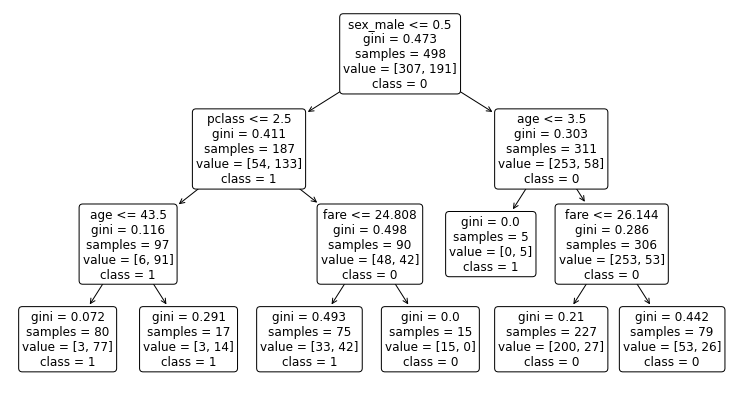

In [9]:
plt.figure(figsize=(13, 7))
plot_tree(clf_3_deep, feature_names=X_train.columns, class_names=clf_3_deep.classes_.astype(str), rounded=True)


In [10]:
y_pred_3 = clf_3_deep.predict(X_train)
y_pred_3

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,

##### #3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [11]:
print(f'Accuracy of Decision Tree classifier on training set: {clf_3_deep.score(X_train, y_train):.2}')

Accuracy of Decision Tree classifier on training set: 0.82


In [12]:
confusion_matrix(y_train, y_pred_3)

array([[268,  39],
       [ 53, 138]])

In [13]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [14]:
pd.DataFrame(confusion_matrix(y_train, y_pred_3))

# Actual on left, predictions on top

,0,1
0,268,39
1,53,138


In [15]:
pd.DataFrame(classification_report(y_train, y_pred_3, output_dict=True)).T

,precision,recall,f1-score,support
0,0.834891,0.872964,0.853503,307.000000
1,0.779661,0.722513,0.750000,191.000000
accuracy,0.815261,0.815261,0.815261,0.815261
macro avg,0.807276,0.797739,0.801752,498.000000
weighted avg,0.813708,0.815261,0.813806,498.000000


##### #4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

When our positive scenario is that someone survived and our negative scenario is that they did not survive, we get the following numbers:
TP = 138
TN = 268
FP = 39
FN = 53

- Accuracy 81.5%
- True Positive rate: 138/ (138 + 53) = 72.25% (This should be TP / (TP + FN), which is recall)
- False Positive rate: 39 / (39 + 268) = 12.7% (This should be FP / (FP + TN), which is the Type I error rate, 1 - True Neg Rate)
- True Negative rate: 268 / (268 + 39) = 87.3% (This should be TN / (TN + FP), whic is specificity)
- False Negative rate: 53 / (53 + 138) = 21.75% (This should be FN /(FN + TP) , which is the type II error rate, 1 - True Pos Rate)
- Precision: 77.97%
- Recall: 72.25%
- F1-score: 75.00%
- Support: 191

##### #5. Run through steps 2-4 using a different max_depth value.

[Text(397.4938953488372, 356.73749999999995, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(248.82906976744184, 309.1725, 'pclass <= 2.5\ngini = 0.411\nsamples = 187\nvalue = [54, 133]\nclass = 1'),
 Text(160.2627906976744, 261.60749999999996, 'age <= 43.5\ngini = 0.116\nsamples = 97\nvalue = [6, 91]\nclass = 1'),
 Text(101.21860465116279, 214.0425, 'age <= 27.5\ngini = 0.072\nsamples = 80\nvalue = [3, 77]\nclass = 1'),
 Text(84.34883720930232, 166.4775, 'age <= 24.5\ngini = 0.161\nsamples = 34\nvalue = [3, 31]\nclass = 1'),
 Text(50.609302325581396, 118.91250000000002, 'fare <= 13.396\ngini = 0.064\nsamples = 30\nvalue = [1, 29]\nclass = 1'),
 Text(33.73953488372093, 71.34749999999997, 'age <= 22.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = 1'),
 Text(16.869767441860464, 23.782500000000027, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = 1'),
 Text(50.609302325581396, 23.782500000000027, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass =

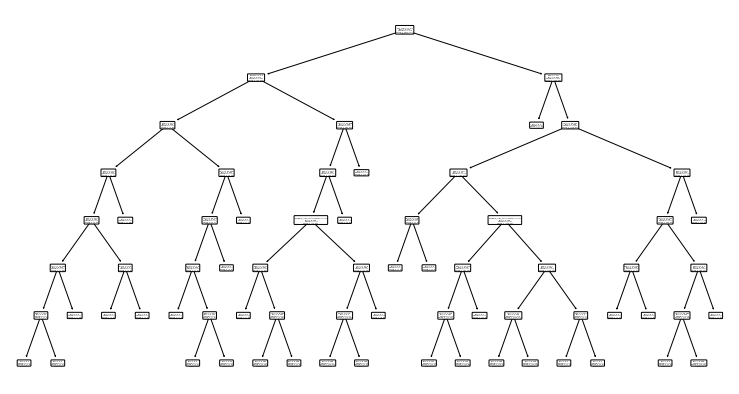

In [16]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

clf_7_deep = DecisionTreeClassifier(max_depth=7, random_state=123)
clf_7_deep = clf_7_deep.fit(X_train, y_train)

plt.figure(figsize=(13, 7))
plot_tree(clf_7_deep, feature_names=X_train.columns, class_names=clf_7_deep.classes_.astype(str), rounded=True)


In [17]:
y_pred_7 = clf_7_deep.predict(X_train)
print(f'Accuracy of Decision Tree classifier on training set: {clf_7_deep.score(X_train, y_train):.2f}')

Accuracy of Decision Tree classifier on training set: 0.87


In [18]:
confusion_matrix(y_train, y_pred_7)

array([[300,   7],
       [ 59, 132]])

In [19]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [20]:
pd.DataFrame(confusion_matrix(y_train, y_pred_7))

,0,1
0,300,7
1,59,132


In [21]:
pd.DataFrame(classification_report(y_train, y_pred_7, output_dict=True)).T

,precision,recall,f1-score,support
0,0.835655,0.977199,0.900901,307.00000
1,0.949640,0.691099,0.800000,191.00000
accuracy,0.867470,0.867470,0.867470,0.86747
macro avg,0.892647,0.834149,0.850450,498.00000
weighted avg,0.879372,0.867470,0.862202,498.00000


### Under the new model with depth set to 7 instead of 3, when our positive scenario is that someone survived and our negative scenario is that they did not survive, we get the following numbers:
- Accuracy 86.7%
- True Positive rate: 132 /498 = 26.5%
- False Positive rate: 7 / 498 = 1.4% 
- True Negative rate: 300 / 498 = 60.24%
- False Negative rate: 59 / 498 = 5.82%
- Precision: 94.96%
- Recall: 69.1%
- F1-score: 80.0%
- Support: 191

##### #6. Which model performs better on your in-sample data?

The second model which has a max_depth of 7 performs better on the train data than the first sample which has a max_depth of only 3.

##### #7. Which model performs best on your out-of-sample data, the validate set?



In [22]:
print(f'Accuracy of 3 Deep Decision Tree classifier on training set: {clf_3_deep.score(X_validate, y_validate):.2f}')

print(f'Accuracy of 7 Deep Decision Tree classifier on training set: {clf_7_deep.score(X_validate, y_validate):.2f}')

Accuracy of 3 Deep Decision Tree classifier on training set: 0.83
Accuracy of 7 Deep Decision Tree classifier on training set: 0.81


The accuracy of the less deep decision tree model with only 3 questions is more accurate on the validate set.

#### Exercises part 2: Using Telco

In [23]:
# Acquires the telco data
telco = acquire.get_telco_data()
telco.head()

,Unnamed: 0,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,1,2,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,2,1,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


In [24]:
# Preps the dataframe by dropping unwanted columns and making dummy columns for categorical columns after which it drops those as well.
telco = prepare.prep_telco(telco)
telco.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
0,0,9,65.6,593.30,0,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,9,59.9,542.40,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,0,4,73.9,280.85,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
3,1,13,98.0,1237.85,1,1,0,0,0,0,...,1,1,1,0,0,0,1,0,1,0
4,1,3,83.9,267.40,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0


In [25]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         7021 non-null   int64  
 1   tenure                                 7021 non-null   int64  
 2   monthly_charges                        7021 non-null   float64
 3   total_charges                          7021 non-null   float64
 4   gender_Male                            7021 non-null   uint8  
 5   partner_Yes                            7021 non-null   uint8  
 6   dependents_Yes                         7021 non-null   uint8  
 7   multiple_lines_No phone service        7021 non-null   uint8  
 8   multiple_lines_Yes                     7021 non-null   uint8  
 9   online_security_No internet service    7021 non-null   uint8  
 10  online_security_Yes                    7021 non-null   uint8  
 11  onli

In [26]:
# Splitting the data into train, validate, test subsets
train, test = train_test_split(telco, train_size = 0.8, stratify = telco.churn_Yes, random_state = 1234)
train, validate = train_test_split(train, train_size = 0.7, stratify = train.churn_Yes, random_state = 1234)

In [27]:
# Checking the split worked properly
train.info(), validate.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3931 entries, 2091 to 3137
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         3931 non-null   int64  
 1   tenure                                 3931 non-null   int64  
 2   monthly_charges                        3931 non-null   float64
 3   total_charges                          3931 non-null   float64
 4   gender_Male                            3931 non-null   uint8  
 5   partner_Yes                            3931 non-null   uint8  
 6   dependents_Yes                         3931 non-null   uint8  
 7   multiple_lines_No phone service        3931 non-null   uint8  
 8   multiple_lines_Yes                     3931 non-null   uint8  
 9   online_security_No internet service    3931 non-null   uint8  
 10  online_security_Yes                    3931 non-null   uint8  
 11  o

(None, None, None)

In [28]:
# Checking to make sure the target variable was split between groups in a similar way.
train.churn_Yes.mean(), validate.churn_Yes.mean(), test.churn_Yes.mean()

(0.26430933604680745, 0.26468842729970327, 0.26476868327402137)

In [29]:
# Making a baseline prediction.

churn_baseline = train.churn_Yes.value_counts().idxmax()
churn_baseline

# 0 as a boolean in the churn_Yes column represents a customer that did not churn.

0

In [30]:
# What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the 
# most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? 
# This is your baseline accuracy.
train[train.churn_Yes == churn_baseline].shape[0] / train.shape[0]

# Baseline accuracy is roughly 73.57%, meaning that when assuming all customers did not churn, we're right 73.57% of 
# the time.


0.7356906639531926

In [31]:
# 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training 
# sample)

X_train = train.drop(columns=['churn_Yes'])
y_train = train.churn_Yes

X_validate = validate.drop(columns=['churn_Yes'])
y_validate = validate.churn_Yes

X_test = test.drop(columns=['churn_Yes'])
y_test = test.churn_Yes

clf_3_deep = DecisionTreeClassifier(max_depth=3, random_state=123)
clf_3_deep = clf_3_deep.fit(X_train, y_train)

clf_8_deep = DecisionTreeClassifier(max_depth=8, random_state=123)
clf_8_deep = clf_8_deep.fit(X_train, y_train)

clf_12_deep = DecisionTreeClassifier(max_depth=12, random_state=123)
clf_12_deep = clf_12_deep.fit(X_train, y_train)

# I came back later and added the following sets to analyze other depths to see how it would affect model accuracy.


clf_1_deep = DecisionTreeClassifier(max_depth=1, random_state=123)
clf_1_deep = clf_1_deep.fit(X_train, y_train)

clf_2_deep = DecisionTreeClassifier(max_depth=2, random_state=123)
clf_2_deep = clf_2_deep.fit(X_train, y_train)

clf_4_deep = DecisionTreeClassifier(max_depth=4, random_state=123)
clf_4_deep = clf_4_deep.fit(X_train, y_train)

clf_5_deep = DecisionTreeClassifier(max_depth=5, random_state=123)
clf_5_deep = clf_5_deep.fit(X_train, y_train)

clf_6_deep = DecisionTreeClassifier(max_depth=6, random_state=123)
clf_6_deep = clf_6_deep.fit(X_train, y_train)

clf_7_deep = DecisionTreeClassifier(max_depth=7, random_state=123)
clf_7_deep = clf_7_deep.fit(X_train, y_train)


In [32]:
y_pred_3 = clf_3_deep.predict(X_train)
y_pred_8 = clf_8_deep.predict(X_train)
y_pred_12 = clf_12_deep.predict(X_train)

In [33]:
print(f'Accuracy of 3 Deep Decision Tree classifier on training set: {clf_3_deep.score(X_train, y_train):.2f}')
print(f'Accuracy of 8 Deep Decision Tree classifier on training set: {clf_8_deep.score(X_train, y_train):.2f}')
print(f'Accuracy of 12 Deep Decision Tree classifier on training set: {clf_12_deep.score(X_train, y_train):.2f}')

Accuracy of 3 Deep Decision Tree classifier on training set: 0.79
Accuracy of 8 Deep Decision Tree classifier on training set: 0.85
Accuracy of 12 Deep Decision Tree classifier on training set: 0.95


In [34]:
y_pred_1 = clf_1_deep.predict(X_train)
y_pred_2 = clf_2_deep.predict(X_train)
y_pred_4 = clf_4_deep.predict(X_train)
y_pred_5 = clf_5_deep.predict(X_train)
y_pred_6 = clf_6_deep.predict(X_train)
y_pred_7 = clf_7_deep.predict(X_train)
print(f'Accuracy of 1 Deep Decision Tree classifier on training set: {clf_1_deep.score(X_train, y_train):.2f}')
print(f'Accuracy of 2 Deep Decision Tree classifier on training set: {clf_2_deep.score(X_train, y_train):.2f}')
print(f'Accuracy of 4 Deep Decision Tree classifier on training set: {clf_4_deep.score(X_train, y_train):.2f}')
print(f'Accuracy of 5 Deep Decision Tree classifier on training set: {clf_5_deep.score(X_train, y_train):.2f}')
print(f'Accuracy of 6 Deep Decision Tree classifier on training set: {clf_6_deep.score(X_train, y_train):.2f}')
print(f'Accuracy of 7 Deep Decision Tree classifier on training set: {clf_7_deep.score(X_train, y_train):.2f}')

Accuracy of 1 Deep Decision Tree classifier on training set: 0.74
Accuracy of 2 Deep Decision Tree classifier on training set: 0.79
Accuracy of 4 Deep Decision Tree classifier on training set: 0.79
Accuracy of 5 Deep Decision Tree classifier on training set: 0.81
Accuracy of 6 Deep Decision Tree classifier on training set: 0.82
Accuracy of 7 Deep Decision Tree classifier on training set: 0.83


##### #4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [35]:
y_train.value_counts()

0    2892
1    1039
Name: churn_Yes, dtype: int64

In [36]:
print("Confusion matrix for 3 deep model")
pd.DataFrame(confusion_matrix(y_train, y_pred_3))

Confusion matrix for 3 deep model


,0,1
0,2704,188
1,630,409


In [37]:
print("Classification report for 3 deep model")
pd.DataFrame(classification_report(y_train, y_pred_3, output_dict=True)).T

Classification report for 3 deep model


,precision,recall,f1-score,support
0,0.811038,0.934993,0.868615,2892.00000
1,0.685092,0.393648,0.500000,1039.00000
accuracy,0.791910,0.791910,0.791910,0.79191
macro avg,0.748065,0.664320,0.684308,3931.00000
weighted avg,0.777749,0.791910,0.771187,3931.00000


When our positive scenario is that someone churned and our negative scenario is that they did not churn, for the previous model above with a depth of 3 we get the following numbers:
- Accuracy 79.2%
- True Positive rate: 409 / 3931 = 10.4%
- False Positive rate: 188 / 3931 = 4.8%
- True Negative rate: 2704 / 3931 = 68.8%
- False Negative rate: 630 / 3931 = 16%
- Precision: 68.5%
- Recall: 39.4%
- F1-score: 50%
- Support: 1039

In [38]:
print("Confusion matrix for 8 deep model")
pd.DataFrame(confusion_matrix(y_train, y_pred_8))

Confusion matrix for 8 deep model


,0,1
0,2627,265
1,339,700


In [39]:
print("Classification report for 8 deep model")
pd.DataFrame(classification_report(y_train, y_pred_8, output_dict=True)).T

Classification report for 8 deep model


,precision,recall,f1-score,support
0,0.885705,0.908368,0.896893,2892.00000
1,0.725389,0.673725,0.698603,1039.00000
accuracy,0.846350,0.846350,0.846350,0.84635
macro avg,0.805547,0.791046,0.797748,3931.00000
weighted avg,0.843332,0.846350,0.844483,3931.00000


When our positive scenario is that someone churned and our negative scenario is that they did not churn, for the previous model above with a depth of 8 we get the following numbers:
- Accuracy 84.6%
- True Positive rate: 700 / 3931 = 17.8%
- False Positive rate: 265 / 3931 = 6.7%
- True Negative rate: 2627 / 3931 = 66.8%
- False Negative rate: 339 / 3931 = 8.6%
- Precision: 72.5%
- Recall: 67.4%
- F1-score: 69.9%
- Support: 1039

In [40]:
print("Confusion matrix for 12 deep model")
pd.DataFrame(confusion_matrix(y_train, y_pred_12))

Confusion matrix for 12 deep model


,0,1
0,2801,91
1,115,924


In [41]:
print("Classification report for 12 deep model")
pd.DataFrame(classification_report(y_train, y_pred_12, output_dict=True)).T

Classification report for 12 deep model


,precision,recall,f1-score,support
0,0.960562,0.968534,0.964532,2892.000000
1,0.910345,0.889317,0.899708,1039.000000
accuracy,0.947596,0.947596,0.947596,0.947596
macro avg,0.935454,0.928925,0.932120,3931.000000
weighted avg,0.947289,0.947596,0.947398,3931.000000


When our positive scenario is that someone churned and our negative scenario is that they did not churn, for the previous model above with a depth of 12 we get the following numbers:
- Accuracy 94.8%
- True Positive rate: 924 / 3931 = 23.5%
- False Positive rate: 91 / 3931 = 2.3%
- True Negative rate: 2801 / 3931 = 71.3%
- False Negative rate: 115 / 3931 = 2.9%
- Precision: 91%
- Recall: 88.9%
- F1-score: 90%
- Support: 1039

##### #6. Which model performs best on your in-sample data?

The third model which has a max_depth of 12 performs better on the train data than the first model which has a max_depth of only 3 and the second model which has a max depth of 8.

##### #7. Which model performs best on your out-of-sample data, the validate set?



In [42]:
print(f'Accuracy of 3 Deep Decision Tree classifier on validate set: {clf_3_deep.score(X_validate, y_validate):.2f}')

print(f'Accuracy of 8 Deep Decision Tree classifier on validate set: {clf_8_deep.score(X_validate, y_validate):.2f}')

print(f'Accuracy of 12 Deep Decision Tree classifier on validate set: {clf_12_deep.score(X_validate, y_validate):.2f}')

Accuracy of 3 Deep Decision Tree classifier on validate set: 0.80
Accuracy of 8 Deep Decision Tree classifier on validate set: 0.77
Accuracy of 12 Deep Decision Tree classifier on validate set: 0.75


The accuracy of the least deep decision tree model with only 3 questions is more accurate on the validate set than the other two.

In [43]:
# For my own edification I went back and added code to see how models of 1 and 2 deep would compare.  Here is the data
# for the model on the validate set.

print(f'Accuracy of 1 Deep Decision Tree classifier on validate set: {clf_1_deep.score(X_validate, y_validate):.2f}')

print(f'Accuracy of 2 Deep Decision Tree classifier on validate set: {clf_2_deep.score(X_validate, y_validate):.2f}')

print(f'Accuracy of 4 Deep Decision Tree classifier on validate set: {clf_4_deep.score(X_validate, y_validate):.2f}')

print(f'Accuracy of 5 Deep Decision Tree classifier on validate set: {clf_5_deep.score(X_validate, y_validate):.2f}')

print(f'Accuracy of 6 Deep Decision Tree classifier on validate set: {clf_6_deep.score(X_validate, y_validate):.2f}')

print(f'Accuracy of 7 Deep Decision Tree classifier on validate set: {clf_7_deep.score(X_validate, y_validate):.2f}')

Accuracy of 1 Deep Decision Tree classifier on validate set: 0.74
Accuracy of 2 Deep Decision Tree classifier on validate set: 0.80
Accuracy of 4 Deep Decision Tree classifier on validate set: 0.80
Accuracy of 5 Deep Decision Tree classifier on validate set: 0.80
Accuracy of 6 Deep Decision Tree classifier on validate set: 0.78
Accuracy of 7 Deep Decision Tree classifier on validate set: 0.79


In [44]:
# I've decided to test some "feature engineering" by running the same model and depth options as before but with 
# total_charges and a few others dropped out

In [45]:
telco = acquire.get_telco_data()
telco.drop(columns = ['total_charges', 'online_security', 'online_backup', 'device_protection', 'tech_support'])

,Unnamed: 0,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,streaming_tv,streaming_movies,paperless_billing,monthly_charges,churn,contract_type,payment_type,internet_service_type
0,0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,Yes,No,Yes,65.60,No,One year,Mailed check,DSL
1,1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,Yes,No,59.90,No,Month-to-month,Mailed check,DSL
2,2,2,1,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,73.90,Yes,Month-to-month,Electronic check,Fiber optic
3,3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Yes,Yes,Yes,98.00,Yes,Month-to-month,Electronic check,Fiber optic
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Yes,No,Yes,83.90,Yes,Month-to-month,Mailed check,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,2,2,9987-LUTYD,Female,0,No,No,13,Yes,No,No,No,No,55.15,No,One year,Mailed check,DSL
7039,7039,2,1,1,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,Yes,Yes,85.10,Yes,Month-to-month,Electronic check,Fiber optic
7040,7040,1,2,1,9992-UJOEL,Male,0,No,No,2,Yes,No,No,No,Yes,50.30,No,Month-to-month,Mailed check,DSL
7041,7041,1,2,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,No,Yes,No,67.85,No,Two year,Mailed check,DSL


In [46]:
telco = prepare.prep_telco(telco)
telco.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
0,0,9,65.6,593.30,0,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,9,59.9,542.40,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,0,4,73.9,280.85,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
3,1,13,98.0,1237.85,1,1,0,0,0,0,...,1,1,1,0,0,0,1,0,1,0
4,1,3,83.9,267.40,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0


In [47]:
# Splitting the data into train, validate, test subsets
train, test = train_test_split(telco, train_size = 0.8, stratify = telco.churn_Yes, random_state = 1234)
train, validate = train_test_split(train, train_size = 0.7, stratify = train.churn_Yes, random_state = 1234)

# 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training 
# sample)

X_train = train.drop(columns=['churn_Yes'])
y_train = train.churn_Yes

X_validate = validate.drop(columns=['churn_Yes'])
y_validate = validate.churn_Yes

X_test = test.drop(columns=['churn_Yes'])
y_test = test.churn_Yes

clf_1_deep = DecisionTreeClassifier(max_depth=1, random_state=123)
clf_1_deep = clf_1_deep.fit(X_train, y_train)

clf_2_deep = DecisionTreeClassifier(max_depth=2, random_state=123)
clf_2_deep = clf_2_deep.fit(X_train, y_train)

clf_3_deep = DecisionTreeClassifier(max_depth=3, random_state=123)
clf_3_deep = clf_3_deep.fit(X_train, y_train)

clf_4_deep = DecisionTreeClassifier(max_depth=4, random_state=123)
clf_4_deep = clf_4_deep.fit(X_train, y_train)

clf_5_deep = DecisionTreeClassifier(max_depth=5, random_state=123)
clf_5_deep = clf_5_deep.fit(X_train, y_train)

clf_6_deep = DecisionTreeClassifier(max_depth=6, random_state=123)
clf_6_deep = clf_6_deep.fit(X_train, y_train)

clf_7_deep = DecisionTreeClassifier(max_depth=7, random_state=123)
clf_7_deep = clf_7_deep.fit(X_train, y_train)

clf_8_deep = DecisionTreeClassifier(max_depth=8, random_state=123)
clf_8_deep = clf_8_deep.fit(X_train, y_train)

clf_12_deep = DecisionTreeClassifier(max_depth=12, random_state=123)
clf_12_deep = clf_12_deep.fit(X_train, y_train)

In [48]:
y_pred_1 = clf_1_deep.predict(X_train)
y_pred_2 = clf_2_deep.predict(X_train)
y_pred_3 = clf_3_deep.predict(X_train)
y_pred_4 = clf_4_deep.predict(X_train)
y_pred_5 = clf_5_deep.predict(X_train)
y_pred_6 = clf_6_deep.predict(X_train)
y_pred_7 = clf_7_deep.predict(X_train)
y_pred_8 = clf_8_deep.predict(X_train)
y_pred_12 = clf_12_deep.predict(X_train)
print(f'Accuracy of 1 Deep Decision Tree classifier on training set: {clf_1_deep.score(X_train, y_train):.2f}')
print(f'Accuracy of 2 Deep Decision Tree classifier on training set: {clf_2_deep.score(X_train, y_train):.2f}')
print(f'Accuracy of 3 Deep Decision Tree classifier on training set: {clf_3_deep.score(X_train, y_train):.2f}')
print(f'Accuracy of 4 Deep Decision Tree classifier on training set: {clf_4_deep.score(X_train, y_train):.2f}')
print(f'Accuracy of 5 Deep Decision Tree classifier on training set: {clf_5_deep.score(X_train, y_train):.2f}')
print(f'Accuracy of 6 Deep Decision Tree classifier on training set: {clf_6_deep.score(X_train, y_train):.2f}')
print(f'Accuracy of 7 Deep Decision Tree classifier on training set: {clf_7_deep.score(X_train, y_train):.2f}')
print(f'Accuracy of 8 Deep Decision Tree classifier on training set: {clf_8_deep.score(X_train, y_train):.2f}')
print(f'Accuracy of 12 Deep Decision Tree classifier on training set: {clf_12_deep.score(X_train, y_train):.2f}')

Accuracy of 1 Deep Decision Tree classifier on training set: 0.74
Accuracy of 2 Deep Decision Tree classifier on training set: 0.79
Accuracy of 3 Deep Decision Tree classifier on training set: 0.79
Accuracy of 4 Deep Decision Tree classifier on training set: 0.79
Accuracy of 5 Deep Decision Tree classifier on training set: 0.81
Accuracy of 6 Deep Decision Tree classifier on training set: 0.82
Accuracy of 7 Deep Decision Tree classifier on training set: 0.83
Accuracy of 8 Deep Decision Tree classifier on training set: 0.85
Accuracy of 12 Deep Decision Tree classifier on training set: 0.95


In [49]:
print(f'Accuracy of 1 Deep Decision Tree classifier on validate set: {clf_1_deep.score(X_validate, y_validate):.2f}')

print(f'Accuracy of 2 Deep Decision Tree classifier on validate set: {clf_2_deep.score(X_validate, y_validate):.2f}')

print(f'Accuracy of 3 Deep Decision Tree classifier on validate set: {clf_3_deep.score(X_validate, y_validate):.2f}')

print(f'Accuracy of 4 Deep Decision Tree classifier on validate set: {clf_4_deep.score(X_validate, y_validate):.2f}')

print(f'Accuracy of 5 Deep Decision Tree classifier on validate set: {clf_5_deep.score(X_validate, y_validate):.2f}')

print(f'Accuracy of 6 Deep Decision Tree classifier on validate set: {clf_6_deep.score(X_validate, y_validate):.2f}')

print(f'Accuracy of 7 Deep Decision Tree classifier on validate set: {clf_7_deep.score(X_validate, y_validate):.2f}')

print(f'Accuracy of 8 Deep Decision Tree classifier on validate set: {clf_8_deep.score(X_validate, y_validate):.2f}')

print(f'Accuracy of 12 Deep Decision Tree classifier on validate set: {clf_12_deep.score(X_validate, y_validate):.2f}')

Accuracy of 1 Deep Decision Tree classifier on validate set: 0.74
Accuracy of 2 Deep Decision Tree classifier on validate set: 0.80
Accuracy of 3 Deep Decision Tree classifier on validate set: 0.80
Accuracy of 4 Deep Decision Tree classifier on validate set: 0.80
Accuracy of 5 Deep Decision Tree classifier on validate set: 0.80
Accuracy of 6 Deep Decision Tree classifier on validate set: 0.78
Accuracy of 7 Deep Decision Tree classifier on validate set: 0.79
Accuracy of 8 Deep Decision Tree classifier on validate set: 0.77
Accuracy of 12 Deep Decision Tree classifier on validate set: 0.75


### Random Forest Exercises
Continue working in your `model` file with titanic data to do the following: 

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [193]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
titanic = acquire.get_titanic_data()
titanic
train, validate, test = prepare.prep_titanic_data(titanic)
train, validate, test = prepare.impute_age_titanic(train, validate, test)
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
301,1,3,30.189296,2,0,23.2500,0,1,1,0
290,1,1,26.000000,0,0,78.8500,1,0,0,1
779,1,1,43.000000,0,1,211.3375,0,0,0,1
356,1,1,22.000000,0,1,55.0000,0,0,0,1
147,0,3,9.000000,2,2,34.3750,0,0,0,1


In [95]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

rf1 = RandomForestClassifier(max_depth=10, random_state=123, min_samples_leaf = 1)
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [96]:
print(rf.feature_importances_)

[0.15975274 0.12544369 0.03254651 0.03089789 0.16155612 0.01075311
 0.43413841 0.00995849 0.03495305]


#2. Evaluate your results using the model score, confusion matrix, and classification report.

In [97]:
print(f'Accuracy of random forest classifier model 1 on titanic training set: {rf.score(X_train, y_train):.2}')

Accuracy of random forest classifier model 1 on titanic training set: 0.85


In [98]:
y_pred = rf.predict(X_train)
print("Confusion matrix for random forest classifier model 1 on titanic training set:")
pd.DataFrame(confusion_matrix(y_train, y_pred))

Confusion matrix for random forest classifier model 1 on titanic training set:


,0,1
0,290,17
1,56,135


In [99]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.838150,0.888158,0.853414,0.863154,0.857330
recall,0.944625,0.706806,0.853414,0.825716,0.853414
f1-score,0.888208,0.787172,0.853414,0.837690,0.849457
support,307.000000,191.000000,0.853414,498.000000,498.000000


#3. Print and clearly label the following:  Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

I'm assuming Positive scenario is someone surviving, and a Negative scenario is someone NOT surviving.
TP = 176
TN = 305
FP = 2
FN = 15

- Accuracy 96.6%
- True Positive rate: 92.1%
- False Positive rate: .7%
- True Negative rate: 99.3%
- False Negative rate: 7.9%
- Precision: 98.9%
- Recall: 92.1%
- F1-score: 95.4%
- Support: 191


#4. Run through steps increasing your min_samples_leaf and decreasing your max_depth. 


In [100]:
rf2 = RandomForestClassifier(max_depth=9, random_state=123, min_samples_leaf = 2)
rf2.fit(X_train, y_train)
y_pred = rf2.predict(X_train)
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.904615,0.924855,0.911647,0.914735,0.912378
recall,0.957655,0.837696,0.911647,0.897676,0.911647
f1-score,0.930380,0.879121,0.911647,0.904750,0.910720
support,307.000000,191.000000,0.911647,498.000000,498.000000


In [101]:
rf3 = RandomForestClassifier(max_depth=8, random_state=123, min_samples_leaf = 3)
rf3.fit(X_train, y_train)
y_pred = rf3.predict(X_train)
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.869822,0.918750,0.885542,0.894286,0.888588
recall,0.957655,0.769634,0.885542,0.863644,0.885542
f1-score,0.911628,0.837607,0.885542,0.874617,0.883238
support,307.000000,191.000000,0.885542,498.000000,498.000000


In [102]:
rf4 = RandomForestClassifier(max_depth=7, random_state=123, min_samples_leaf = 4)
rf4.fit(X_train, y_train)
y_pred = rf4.predict(X_train)
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.856725,0.910256,0.873494,0.883491,0.877256
recall,0.954397,0.743455,0.873494,0.848926,0.873494
f1-score,0.902928,0.818444,0.873494,0.860686,0.870525
support,307.000000,191.000000,0.873494,498.000000,498.000000


In [103]:
rf5 = RandomForestClassifier(max_depth=6, random_state=123, min_samples_leaf = 5)
rf5.fit(X_train, y_train)
y_pred = rf5.predict(X_train)
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.838150,0.888158,0.853414,0.863154,0.857330
recall,0.944625,0.706806,0.853414,0.825716,0.853414
f1-score,0.888208,0.787172,0.853414,0.837690,0.849457
support,307.000000,191.000000,0.853414,498.000000,498.000000


In [104]:
rf6 = RandomForestClassifier(max_depth=5, random_state=123, min_samples_leaf = 6)
rf6.fit(X_train, y_train)
y_pred = rf6.predict(X_train)
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.836676,0.899329,0.855422,0.868003,0.860706
recall,0.951140,0.701571,0.855422,0.826355,0.855422
f1-score,0.890244,0.788235,0.855422,0.839240,0.851120
support,307.000000,191.000000,0.855422,498.000000,498.000000


In [105]:
rf7 = RandomForestClassifier(max_depth=4, random_state=123, min_samples_leaf = 7)
rf7.fit(X_train, y_train)
y_pred = rf7.predict(X_train)
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.816156,0.899281,0.839357,0.857718,0.848037
recall,0.954397,0.654450,0.839357,0.804424,0.839357
f1-score,0.879880,0.757576,0.839357,0.818728,0.832972
support,307.000000,191.000000,0.839357,498.000000,498.000000


In [106]:
rf8 = RandomForestClassifier(max_depth=3, random_state=123, min_samples_leaf = 8)
rf8.fit(X_train, y_train)
y_pred = rf8.predict(X_train)
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.802198,0.888060,0.825301,0.845129,0.835129
recall,0.951140,0.623037,0.825301,0.787088,0.825301
f1-score,0.870343,0.732308,0.825301,0.801325,0.817402
support,307.000000,191.000000,0.825301,498.000000,498.000000


In [107]:
rf9 = RandomForestClassifier(max_depth=2, random_state=123, min_samples_leaf = 9)
rf9.fit(X_train, y_train)
y_pred = rf9.predict(X_train)
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.796196,0.892308,0.821285,0.844252,0.833058
recall,0.954397,0.607330,0.821285,0.780864,0.821285
f1-score,0.868148,0.722741,0.821285,0.795445,0.812380
support,307.000000,191.000000,0.821285,498.000000,498.000000


In [108]:
rf10 = RandomForestClassifier(max_depth=1, random_state=123, min_samples_leaf = 10)
rf10.fit(X_train, y_train)
y_pred = rf10.predict(X_train)
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.759690,0.882883,0.787149,0.821286,0.806939
recall,0.957655,0.513089,0.787149,0.735372,0.787149
f1-score,0.847262,0.649007,0.787149,0.748134,0.771224
support,307.000000,191.000000,0.787149,498.000000,498.000000


In [153]:
rf11 = RandomForestClassifier(max_depth=5, random_state=123, min_samples_leaf = 5)
rf11.fit(X_train, y_train)
y_pred = rf11.predict(X_train)
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.838150,0.888158,0.853414,0.863154,0.857330
recall,0.944625,0.706806,0.853414,0.825716,0.853414
f1-score,0.888208,0.787172,0.853414,0.837690,0.849457
support,307.000000,191.000000,0.853414,498.000000,498.000000


#5. What are the differences in the evaluation metrics?  Which performs better on your in-sample data?  Why?

As max_depth decreases and min_samples_leaf increases the accuracy goes down when testing on the in sample train data.

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [151]:
print(f'Accuracy of random forest classifier model 1 on titanic training set: {rf1.score(X_train, y_train):.2}')
print(f'Accuracy of random forest classifier model 1 on titanic test set: {rf1.score(X_validate, y_validate):.2}')
print(f'The difference between the two for model 1 is: {rf1.score(X_train, y_train) - rf1.score(X_validate, y_validate):.2}\n')

print(f'Accuracy of random forest classifier model 2 on titanic training set: {rf2.score(X_train, y_train):.2}')
print(f'Accuracy of random forest classifier model 2 on titanic test set: {rf2.score(X_validate, y_validate):.2}')
print(f'The difference between the two for model 2 is: {rf2.score(X_train, y_train) - rf2.score(X_validate, y_validate):.2}\n')

print(f'Accuracy of random forest classifier model 3 on titanic training set: {rf3.score(X_train, y_train):.2}')
print(f'Accuracy of random forest classifier model 3 on titanic test set: {rf3.score(X_validate, y_validate):.2}')
print(f'The difference between the two for model 3 is: {rf3.score(X_train, y_train) - rf3.score(X_validate, y_validate):.2}\n')

print(f'Accuracy of random forest classifier model 4 on titanic training set: {rf4.score(X_train, y_train):.2}')
print(f'Accuracy of random forest classifier model 4 on titanic test set: {rf4.score(X_validate, y_validate):.2}')
print(f'The difference between the two for model 4 is: {rf4.score(X_train, y_train) - rf4.score(X_validate, y_validate):.2}\n')

print(f'Accuracy of random forest classifier model 5 on titanic training set: {rf5.score(X_train, y_train):.2}')
print(f'Accuracy of random forest classifier model 5 on titanic test set: {rf5.score(X_validate, y_validate):.2}')
print(f'The difference between the two for model 5 is: {rf5.score(X_train, y_train) - rf5.score(X_validate, y_validate):.2}\n')

print(f'Accuracy of random forest classifier model 6 on titanic training set: {rf6.score(X_train, y_train):.2}')
print(f'Accuracy of random forest classifier model 6 on titanic test set: {rf6.score(X_validate, y_validate):.2}')
print(f'The difference between the two for model 6 is: {rf6.score(X_train, y_train) - rf6.score(X_validate, y_validate):.2}\n')

print(f'Accuracy of random forest classifier model 7 on titanic training set: {rf7.score(X_train, y_train):.2}')
print(f'Accuracy of random forest classifier model 7 on titanic test set: {rf7.score(X_validate, y_validate):.2}')
print(f'The difference between the two for model 7 is: {rf7.score(X_train, y_train) - rf7.score(X_validate, y_validate):.2}\n')

print(f'Accuracy of random forest classifier model 8 on titanic training set: {rf8.score(X_train, y_train):.2}')
print(f'Accuracy of random forest classifier model 8 on titanic test set: {rf8.score(X_validate, y_validate):.2}')
print(f'The difference between the two for model 8 is: {rf8.score(X_train, y_train) - rf8.score(X_validate, y_validate):.2}\n')

print(f'Accuracy of random forest classifier model 9 on titanic training set: {rf9.score(X_train, y_train):.2}')
print(f'Accuracy of random forest classifier model 9 on titanic test set: {rf9.score(X_validate, y_validate):.2}')
print(f'The difference between the two for model 9 is: {rf9.score(X_train, y_train) - rf9.score(X_validate, y_validate):.2}\n')

print(f'Accuracy of random forest classifier model 10 on titanic training set: {rf10.score(X_train, y_train):.2}')
print(f'Accuracy of random forest classifier model 10 on titanic test set: {rf10.score(X_validate, y_validate):.2}')
print(f'The difference between the two for model 10 is: {rf10.score(X_train, y_train) - rf10.score(X_validate, y_validate):.2}\n')


print(f'Accuracy of random forest classifier model 11 on titanic training set: {rf11.score(X_train, y_train):.2}')
print(f'Accuracy of random forest classifier model 11 on titanic test set: {rf11.score(X_validate, y_validate):.2}')
print(f'The difference between the two for model 11 is: {rf11.score(X_train, y_train) - rf11.score(X_validate, y_validate):.2}\n')


Accuracy of random forest classifier model 1 on titanic training set: 0.97
Accuracy of random forest classifier model 1 on titanic test set: 0.85
The difference between the two for model 1 is: 0.12

Accuracy of random forest classifier model 2 on titanic training set: 0.91
Accuracy of random forest classifier model 2 on titanic test set: 0.85
The difference between the two for model 2 is: 0.061

Accuracy of random forest classifier model 3 on titanic training set: 0.89
Accuracy of random forest classifier model 3 on titanic test set: 0.85
The difference between the two for model 3 is: 0.035

Accuracy of random forest classifier model 4 on titanic training set: 0.87
Accuracy of random forest classifier model 4 on titanic test set: 0.85
The difference between the two for model 4 is: 0.023

Accuracy of random forest classifier model 5 on titanic training set: 0.85
Accuracy of random forest classifier model 5 on titanic test set: 0.84
The difference between the two for model 5 is: 0.012

A

After testing on many different models I've found that the best model seems to be model 6 where the max_depth was set to 5 and min_samples_leaf at 6

In [189]:
# Building the same thing as above but with a function automating it and far more depth, 1-15 for both max_depth and 
# min_sample_leaf

def rf_iteration(X_train, y_train, X_validate, y_validate, trees = 100):
    results = {}
    max_depth = []
    min_samples_leaf = []
    Train_accuracy = []
    Validate_accuracy = []
    Train_Validate_diff = []
    for x in range(1,16):
        for y in range(1,16):
            rf = RandomForestClassifier(max_depth=x, random_state=123, min_samples_leaf = y, n_estimators = trees)
            rf.fit(X_train, y_train)
            max_depth.append(x)
            min_samples_leaf.append(y)
            Train_accuracy.append(rf.score(X_train, y_train))
            Validate_accuracy.append(rf.score(X_validate, y_validate))
            Train_Validate_diff.append(rf.score(X_train, y_train) - rf.score(X_validate, y_validate))
    results = {"max_depth": max_depth, "min_samples_leaf" : min_samples_leaf, "Train_accuracy" : Train_accuracy, "Validate_accuracy" : Validate_accuracy, "Train_Validate_diff" : Train_Validate_diff}
    return results
results_dict = rf_iteration(X_train, y_train, X_validate, y_validate)
        
        

In [190]:
results_df = pd.DataFrame(results_dict)
results_df.head()

,max_depth,min_samples_leaf,Train_accuracy,Validate_accuracy,Train_Validate_diff
0,1,1,0.787149,0.785047,0.002102
1,1,2,0.787149,0.785047,0.002102
2,1,3,0.787149,0.785047,0.002102
3,1,4,0.787149,0.785047,0.002102
4,1,5,0.787149,0.785047,0.002102


In [191]:
results_df.sort_values(["Validate_accuracy", "Train_Validate_diff"], ascending = [False, True]).head(30)

,max_depth,min_samples_leaf,Train_accuracy,Validate_accuracy,Train_Validate_diff
106,8,2,0.905622,0.859813,0.045809
105,8,1,0.929719,0.859813,0.069906
109,8,5,0.869478,0.855140,0.014338
137,10,3,0.895582,0.855140,0.040442
91,7,2,0.901606,0.855140,0.046466
152,11,3,0.901606,0.855140,0.046466
60,5,1,0.859438,0.850467,0.008970
61,5,2,0.861446,0.850467,0.010978
94,7,5,0.865462,0.850467,0.014995
124,9,5,0.871486,0.850467,0.021019


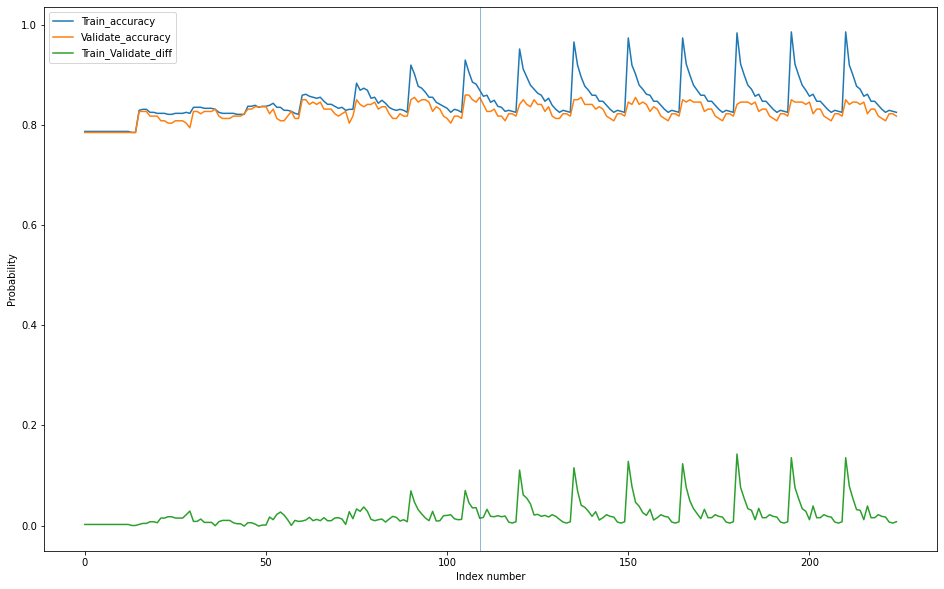

In [213]:
results_df[['Train_accuracy', 'Validate_accuracy', 'Train_Validate_diff']].plot(figsize = (16,10))
plt.xlabel('Index number')
plt.ylabel('Probability')
plt.axvline(109, lw =.5)
plt.show()

In [186]:
# Running the same thing as above but now with ten times the amount of trees (n_estimators = 1000).

results_dict = rf_iteration(X_train, y_train, X_validate, y_validate, 1000)

In [187]:
results_df = pd.DataFrame(results_dict)
results_df.sort_values(["Validate_accuracy", "Train_Validate_diff"], ascending = [False, True]).head(30)

,max_depth,min_samples_leaf,Train_accuracy,Validate_accuracy,Train_Validate_diff
121,9,2,0.917671,0.859813,0.057858
91,7,2,0.897590,0.855140,0.042450
165,12,1,0.977912,0.855140,0.122771
92,7,3,0.887550,0.850467,0.037083
107,8,3,0.891566,0.850467,0.041099
122,9,3,0.897590,0.850467,0.047123
182,13,3,0.897590,0.850467,0.047123
212,15,3,0.897590,0.850467,0.047123
137,10,3,0.899598,0.850467,0.049131
167,12,3,0.901606,0.850467,0.051139


### Random Forest Exercises
Continue working in your model file with the titanic dataset.

In [216]:
from sklearn.neighbors import KNeighborsClassifier
titanic = acquire.get_titanic_data()
titanic

train, validate, test = prepare.prep_titanic_data(titanic)
train, validate, test = prepare.impute_age_titanic(train, validate, test)
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
301,1,3,30.189296,2,0,23.2500,0,1,1,0
290,1,1,26.000000,0,0,78.8500,1,0,0,1
779,1,1,43.000000,0,1,211.3375,0,0,0,1
356,1,1,22.000000,0,1,55.0000,0,0,0,1
147,0,3,9.000000,2,2,34.3750,0,0,0,1


##### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [217]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier()

##### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [218]:
y_pred = knn.predict(X_train)

In [219]:
print(f'Accuracy of KNN classifier on training set: {knn.score(X_train, y_train):.2}')

Accuracy of KNN classifier on training set: 0.78


In [302]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,257,50
1,61,130


In [ ]:
confusion_matrix()

In [295]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

In [222]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.808176,0.837134,0.822400,307.000000
1,0.722222,0.680628,0.700809,191.000000
accuracy,0.777108,0.777108,0.777108,0.777108
macro avg,0.765199,0.758881,0.761604,498.000000
weighted avg,0.775210,0.777108,0.775766,498.000000


##### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [242]:
# I'm assuming Positive scenario is someone surviving, and a Negative scenario is someone NOT surviving.

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Accuracy:", round((TP + TN) / (TP + TN + FP + FN), 4)*100,"%")
print("True Positive rate:", round(TP / (TP + FN),4)*100,"%")
print("False Positive rate:", round(FP / (FP + TN),4)*100,"%")
print("True Negative rate:", round(TN / (TN + FP),4)*100,"%")
print("False Negative rate:", round(FN / (FN + TP),4)*100,"%")
print("Precision:", round(precision,4)*100,"%")
print("Recall:", round(recall, 4)*100,"%")
print("F1-score:", round((2 * precision * recall) / (precision + recall),4)*100,"%")
print("Support:", TP + FN)


Accuracy: 36.14 %
True Positive rate: 68.06 %
False Positive rate: 16.29 %
True Negative rate: 83.71 %
False Negative rate: 31.94 %
Precision: 72.22 %
Recall: 68.06 %
F1-score: 70.08 %
Support: 191


##### 4. Run through steps 2-4 setting k to 10

##### 5. Run through setps 2-4 setting k to 20

(I'm going to do this with a function and run through k = 1 to 20, see below)

In [267]:
def knn_iteration(X_train, y_train, X_validate, y_validate):
    for x in range(1,21):
        print("\n")
        print(f"Results for {x} nearest neighbor(s).")
        knn = KNeighborsClassifier(n_neighbors=x, weights='uniform')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_train)
        print(f'Accuracy of {x} nearest neighbors(s) on training set: {knn.score(X_train, y_train):.2}')
        print("\n")
        print(pd.DataFrame(confusion_matrix(y_train, y_pred)))
        print("\n")
        TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
        print(pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T)
        print("\n")
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        print("Accuracy:", round((TP + TN) / (TP + TN + FP + FN), 4)*100,"%")
        print("True Positive rate:", round(TP / (TP + FN),4)*100,"%")
        print("False Positive rate:", round(FP / (FP + TN),4)*100,"%")
        print("True Negative rate:", round(TN / (TN + FP),4)*100,"%")
        print("False Negative rate:", round(FN / (FN + TP),4)*100,"%")
        print("Precision:", round(precision,4)*100,"%")
        print("Recall:", round(recall, 4)*100,"%")
        print("F1-score:", round(2 * precision * recall / (precision + recall),4)*100,"%")
        print("Support:", TP + FN)


In [268]:
knn_iteration(X_train, y_train, X_validate, y_validate)



Results for 1 nearest neighbor(s).
Accuracy of 1 nearest neighbors(s) on training set: 0.99


     0    1
0  301    6
1    1  190


              precision    recall  f1-score     support
0              0.996689  0.980456  0.988506  307.000000
1              0.969388  0.994764  0.981912  191.000000
accuracy       0.985944  0.985944  0.985944    0.985944
macro avg      0.983038  0.987610  0.985209  498.000000
weighted avg   0.986218  0.985944  0.985977  498.000000


Accuracy: 98.59 %
True Positive rate: 99.48 %
False Positive rate: 1.95 %
True Negative rate: 98.05 %
False Negative rate: 0.52 %
Precision: 96.94 %
Recall: 99.48 %
F1-score: 98.19 %
Support: 191


Results for 2 nearest neighbor(s).
Accuracy of 2 nearest neighbors(s) on training set: 0.84


     0    1
0  306    1
1   80  111


              precision    recall  f1-score     support
0              0.792746  0.996743  0.883117  307.000000
1              0.991071  0.581152  0.732673  191.000000
accuracy       0.837349  0.837

              precision    recall  f1-score     support
0              0.734043  0.899023  0.808199  307.000000
1              0.745902  0.476440  0.581470  191.000000
accuracy       0.736948  0.736948  0.736948    0.736948
macro avg      0.739972  0.687731  0.694834  498.000000
weighted avg   0.738591  0.736948  0.721241  498.000000


Accuracy: 73.69 %
True Positive rate: 47.64 %
False Positive rate: 10.100000000000001 %
True Negative rate: 89.9 %
False Negative rate: 52.35999999999999 %
Precision: 74.59 %
Recall: 47.64 %
F1-score: 58.15 %
Support: 191


Results for 15 nearest neighbor(s).
Accuracy of 15 nearest neighbors(s) on training set: 0.73


     0    1
0  261   46
1   90  101


              precision    recall  f1-score     support
0              0.743590  0.850163  0.793313  307.000000
1              0.687075  0.528796  0.597633  191.000000
accuracy       0.726908  0.726908  0.726908    0.726908
macro avg      0.715332  0.689479  0.695473  498.000000
weighted avg   0.721914 

##### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

As K increases, the prediction on Train data goes down in Accuracy, Precision, and Recall, however there is some fluctation between certain K values when we would expect worse prediction and it performs slightly better than expected.

The best performer on the in sample data is K of 1.  It seems like whatever single metric is closest to it is being trained into the model as the ONLY important qualifier for guessing when then looking at the same training data to predict.  It's essentially overfitting.

##### 7. Which model performs best on our out-of-sample data from validate?

In [289]:
# Making a function to compare results.

def knn_results(X_train, y_train, X_validate, y_validate):
    results = {}
    K = []
    Train_accuracy = []
    Validate_accuracy = []
    Train_Validate_diff = []
    for x in range(1,21):
        knn = KNeighborsClassifier(n_neighbors=x, weights='uniform')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_train)
        K.append(x)
        Train_accuracy.append(knn.score(X_train, y_train))
        Validate_accuracy.append(knn.score(X_validate, y_validate))
        Train_Validate_diff.append(knn.score(X_train, y_train) - knn.score(X_validate, y_validate))
    results = {"K" : K, "Train_accuracy" : Train_accuracy, "Validate_accuracy" : Validate_accuracy, "Train_Validate_diff" : Train_Validate_diff}
    return results

results_dict = knn_results(X_train, y_train, X_validate, y_validate)
        

In [290]:
knn_df = pd.DataFrame(results_dict)
knn_df.sort_values("Validate_accuracy", ascending=False)

,K,Train_accuracy,Validate_accuracy,Train_Validate_diff
0,1,0.985944,0.757009,0.228934
13,14,0.736948,0.752336,-0.015389
7,8,0.734940,0.752336,-0.017397
8,9,0.740964,0.747664,-0.006700
17,18,0.718876,0.747664,-0.028788
15,16,0.726908,0.747664,-0.020756
11,12,0.730924,0.742991,-0.012067
9,10,0.734940,0.742991,-0.008051
19,20,0.714859,0.742991,-0.028131
2,3,0.823293,0.738318,0.084975


It seems like a K value of 13 or 7 both return the same Validate Accuracy and essentially the same difference between validate and train.

### Logistic Regression Exercises
In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.

##### 1. Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?



In [330]:
from sklearn.linear_model import LogisticRegression

titanic = acquire.get_titanic_data()
train, validate, test = prepare.prep_titanic_data(titanic)
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
301,1,3,30.189296,2,0,23.2500,0,1,1,0
290,1,1,26.000000,0,0,78.8500,1,0,0,1
779,1,1,43.000000,0,1,211.3375,0,0,0,1
356,1,1,22.000000,0,1,55.0000,0,0,0,1
147,0,3,9.000000,2,2,34.3750,0,0,0,1


In [331]:
train.drop(['sibsp', 'parch', 'alone', 'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton'], axis =1, inplace=True)
train.head()

,survived,pclass,age,fare
301,1,3,30.189296,23.2500
290,1,1,26.000000,78.8500
779,1,1,43.000000,211.3375
356,1,1,22.000000,55.0000
147,0,3,9.000000,34.3750


In [332]:
validate.drop(['sibsp', 'parch', 'alone', 'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton'], axis =1, inplace=True)
test.drop(['sibsp', 'parch', 'alone', 'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton'], axis =1, inplace=True)
validate.head()

,survived,pclass,age,fare
91,0,3,20.000000,7.8542
297,0,1,2.000000,151.5500
101,0,3,30.189296,7.8958
705,0,2,39.000000,26.0000
335,0,3,30.189296,7.8958


In [333]:
baseline_prediction = 0 
(train.survived == baseline_prediction).mean()

0.6164658634538153

In [334]:
X_train = train.drop(columns='survived')
y_train = train.survived

X_validate = validate.drop(columns='survived')
y_validate = validate.survived

X_test = test.drop(columns='survived')
y_test = test.survived

In [335]:
logit = LogisticRegression(random_state=123)
logit.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [336]:
y_pred = logit.predict(X_train)

In [342]:
logit.coef_

array([[-0.95167944, -0.03949301,  0.00372404]])

In [339]:
print(f'Accuracy of Logistic Regression classifier on training set: {logit.score(X_train, y_train)}')

Accuracy of Logistic Regression classifier on training set: 0.6987951807228916


With an accuracy of approximaly 70% this model performs marginally better than the baseline accuracy of 62%, but this may differ when it is tested against the validate set.

In [343]:
print(f'Accuracy of Logistic Regression classifier on validate set: {logit.score(X_validate, y_validate)}')

Accuracy of Logistic Regression classifier on validate set: 0.7289719626168224


##### 2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.



In [361]:
titanic = acquire.get_titanic_data()
train, validate, test = prepare.prep_titanic_data(titanic)
train.drop(['sibsp', 'parch', 'alone', 'embark_town_Queenstown', 'embark_town_Southampton'], axis =1, inplace=True)
validate.drop(['sibsp', 'parch', 'alone', 'embark_town_Queenstown', 'embark_town_Southampton'], axis =1, inplace=True)
test.drop(['sibsp', 'parch', 'alone', 'embark_town_Queenstown', 'embark_town_Southampton'], axis =1, inplace=True)
validate.head()

,survived,pclass,age,fare,sex_male
91,0,3,20.000000,7.8542,1
297,0,1,2.000000,151.5500,0
101,0,3,30.189296,7.8958,1
705,0,2,39.000000,26.0000,1
335,0,3,30.189296,7.8958,1


In [363]:
X_train = train.drop(columns='survived')
y_train = train.survived

X_validate = validate.drop(columns='survived')
y_validate = validate.survived

X_test = test.drop(columns='survived')
y_test = test.survived

logit = LogisticRegression(random_state=123)
logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)

print(f'Accuracy of Logistic Regression classifier on training set: {logit.score(X_train, y_train)}')
print(f'Accuracy of Logistic Regression classifier on validate set: {logit.score(X_validate, y_validate)}')

Accuracy of Logistic Regression classifier on training set: 0.7951807228915663
Accuracy of Logistic Regression classifier on validate set: 0.794392523364486


When adding sex into the model, it returns an accuracy of about 79.5% on both the training and validate sets.

##### 3. Try out other combinations of features and models.



In [389]:
# Adding in the "alone" feature to the model
titanic = acquire.get_titanic_data()
train, validate, test = prepare.prep_titanic_data(titanic)
train.drop(['sibsp', 'parch', 'embark_town_Queenstown', 'embark_town_Southampton'], axis =1, inplace=True)
validate.drop(['sibsp', 'parch', 'embark_town_Queenstown', 'embark_town_Southampton'], axis =1, inplace=True)
test.drop(['sibsp', 'parch', 'embark_town_Queenstown', 'embark_town_Southampton'], axis =1, inplace=True)
validate.head()

,survived,pclass,age,fare,alone,sex_male
91,0,3,20.000000,7.8542,1,1
297,0,1,2.000000,151.5500,0,0
101,0,3,30.189296,7.8958,1,1
705,0,2,39.000000,26.0000,1,1
335,0,3,30.189296,7.8958,1,1


In [390]:
X_train = train.drop(columns='survived')
y_train = train.survived

X_validate = validate.drop(columns='survived')
y_validate = validate.survived

X_test = test.drop(columns='survived')
y_test = test.survived

logit = LogisticRegression(random_state=123)
logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)

print(f'Accuracy of Logistic Regression classifier on training set: {logit.score(X_train, y_train)}')
print(f'Accuracy of Logistic Regression classifier on validate set: {logit.score(X_validate, y_validate)}')

Accuracy of Logistic Regression classifier on training set: 0.7871485943775101
Accuracy of Logistic Regression classifier on validate set: 0.7990654205607477


In [393]:
# Same as above with different hyperparameters
X_train = train.drop(columns='survived')
y_train = train.survived

X_validate = validate.drop(columns='survived')
y_validate = validate.survived

X_test = test.drop(columns='survived')
y_test = test.survived

logit = LogisticRegression(class_weight='balanced', random_state=123)
logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)

print(f'Accuracy of Logistic Regression classifier on training set: {logit.score(X_train, y_train)}')
print(f'Accuracy of Logistic Regression classifier on validate set: {logit.score(X_validate, y_validate)}')

Accuracy of Logistic Regression classifier on training set: 0.7791164658634538
Accuracy of Logistic Regression classifier on validate set: 0.8130841121495327


In [364]:
# Adding in the encoded "embark_town" feature to the model.
titanic = acquire.get_titanic_data()
train, validate, test = prepare.prep_titanic_data(titanic)
train.drop(['sibsp', 'parch'], axis =1, inplace=True)
validate.drop(['sibsp', 'parch'], axis =1, inplace=True)
test.drop(['sibsp', 'parch'], axis =1, inplace=True)
validate.head()

,survived,pclass,age,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
91,0,3,20.000000,7.8542,1,1,0,1
297,0,1,2.000000,151.5500,0,0,0,1
101,0,3,30.189296,7.8958,1,1,0,1
705,0,2,39.000000,26.0000,1,1,0,1
335,0,3,30.189296,7.8958,1,1,0,1


In [381]:
X_train = train.drop(columns='survived')
y_train = train.survived

X_validate = validate.drop(columns='survived')
y_validate = validate.survived

X_test = test.drop(columns='survived')
y_test = test.survived

logit = LogisticRegression(random_state=123)
logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)

print(f'Accuracy of Logistic Regression classifier on training set: {logit.score(X_train, y_train)}')
print(f'Accuracy of Logistic Regression classifier on validate set: {logit.score(X_validate, y_validate)}')

Accuracy of Logistic Regression classifier on training set: 0.7991967871485943
Accuracy of Logistic Regression classifier on validate set: 0.7990654205607477


In [383]:
# Same as model above with different hyperparameters
X_train = train.drop(columns='survived')
y_train = train.survived

X_validate = validate.drop(columns='survived')
y_validate = validate.survived

X_test = test.drop(columns='survived')
y_test = test.survived

logit = LogisticRegression(random_state=123, penalty='l1', solver = "liblinear")
logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)

print(f'Accuracy of Logistic Regression classifier on training set: {logit.score(X_train, y_train)}')
print(f'Accuracy of Logistic Regression classifier on validate set: {logit.score(X_validate, y_validate)}')

Accuracy of Logistic Regression classifier on training set: 0.8052208835341366
Accuracy of Logistic Regression classifier on validate set: 0.7990654205607477


##### 4. Use you best 3 models to predict and evaluate on your validate sample.


I ran all of the above models on the validate set and have selected my final model as the one with the following features:
- pclass	
- age	
- fare	
- alone	(feature combining parch and sibsp into one boolean: alone or not)
- sex (encoded)
- embark_town (encoded)

and the following hyperparameters:
- penalty='l1'
- solver = "liblinear"

##### 5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?


In [395]:
titanic = acquire.get_titanic_data()
train, validate, test = prepare.prep_titanic_data(titanic)
train.drop(['sibsp', 'parch'], axis =1, inplace=True)
validate.drop(['sibsp', 'parch'], axis =1, inplace=True)
test.drop(['sibsp', 'parch'], axis =1, inplace=True)
validate.head()

,survived,pclass,age,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
91,0,3,20.000000,7.8542,1,1,0,1
297,0,1,2.000000,151.5500,0,0,0,1
101,0,3,30.189296,7.8958,1,1,0,1
705,0,2,39.000000,26.0000,1,1,0,1
335,0,3,30.189296,7.8958,1,1,0,1


In [396]:
X_train = train.drop(columns='survived')
y_train = train.survived

X_validate = validate.drop(columns='survived')
y_validate = validate.survived

X_test = test.drop(columns='survived')
y_test = test.survived

logit = LogisticRegression(random_state=123, penalty='l1', solver = "liblinear")
logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)

print(f'Accuracy of Logistic Regression classifier on training set: {logit.score(X_train, y_train)}')
print(f'Accuracy of Logistic Regression classifier on validate set: {logit.score(X_validate, y_validate)}')
print(f'Accuracy of Logistic Regression classifier on test set: {logit.score(X_test, y_test)}')

Accuracy of Logistic Regression classifier on training set: 0.8052208835341366
Accuracy of Logistic Regression classifier on validate set: 0.7990654205607477
Accuracy of Logistic Regression classifier on test set: 0.8044692737430168
